# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)
pd.set_option("display.float_format", lambda x: "%.5f" % x)

import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

## Data Overview

- Observations
- Sanity checks

In [7]:
df = pd.read_csv('ExtraaLearn.csv')
print(df.shape)
df.head()

(4612, 15)


,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

,변수명,고유값 수,분포(%)
0,ID,4612,"EXT001: 0.0%, EXT2884: 0.0%, EXT3080: 0.0%, EX..."
1,current_occupation,3,"Professional: 56.7%, Unemployed: 31.2%, Studen..."
2,first_interaction,2,"Website: 55.1%, Mobile App: 44.9%"
3,profile_completed,3,"High: 49.1%, Medium: 48.6%, Low: 2.3%"
4,last_activity,3,"Email Activity: 49.4%, Phone Activity: 26.8%, ..."
5,print_media_type1,2,"No: 89.2%, Yes: 10.8%"
6,print_media_type2,2,"No: 94.9%, Yes: 5.1%"
7,digital_media,2,"No: 88.6%, Yes: 11.4%"
8,educational_channels,2,"No: 84.7%, Yes: 15.3%"
9,referral,2,"No: 98.0%, Yes: 2.0%"


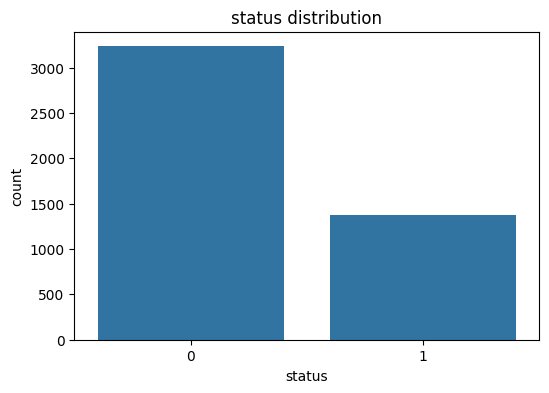

In [15]:
print(df.info())

print("\ncheck null data:")
print(df.isnull().sum().T)

# Description
print("\ndescription:")
print(df.describe())

# categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_distributions = []

for col in categorical_cols:
    value_counts = df[col].value_counts(normalize=True)
    distribution_dict = {
        '변수명': col,
        '고유값 수': len(value_counts),
        '분포(%)': ', '.join([f'{k}: {v:.1%}' for k, v in value_counts.items()])
    }
    categorical_distributions.append(distribution_dict)

cat_dist_df = pd.DataFrame(categorical_distributions)

print("범주형 변수 분포 분석")
display(cat_dist_df)

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='status')
plt.title('status distribution')
plt.show()

- There is no null Data.

## EDA

- It is a good idea to explore the data once again after manipulating it.

### Univariate & Bivariate Analysis

In [25]:
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


In [26]:
# Yes/No -> 1/0
columns_to_convert = ['print_media_type1', 'print_media_type2', 'digital_media', 
                     'educational_channels', 'referral']

for col in columns_to_convert:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

print("변환 결과 확인:")
for col in columns_to_convert:
    print(f"\n{col} 값 분포:")
    print(df[col].value_counts())

df.head()

변환 결과 확인:

print_media_type1 값 분포:
print_media_type1
0    4115
1     497
Name: count, dtype: int64

print_media_type2 값 분포:
print_media_type2
0    4379
1     233
Name: count, dtype: int64

digital_media 값 분포:
digital_media
0    4085
1     527
Name: count, dtype: int64

educational_channels 값 분포:
educational_channels
0    3907
1     705
Name: count, dtype: int64

referral 값 분포:
referral
0    4519
1      93
Name: count, dtype: int64


,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,1,0,1,0,0,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,0,0,0,1,0,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,0,0,1,0,0,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,0,0,0,0,0,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,0,0,0,0,0,0


<Figure size 1000x600 with 0 Axes>

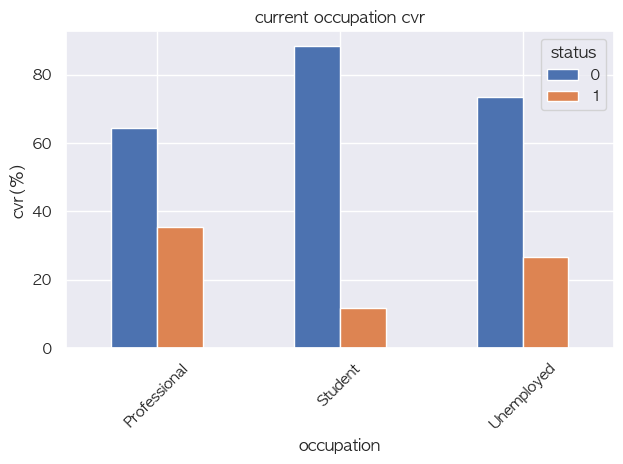

<Figure size 1000x600 with 0 Axes>

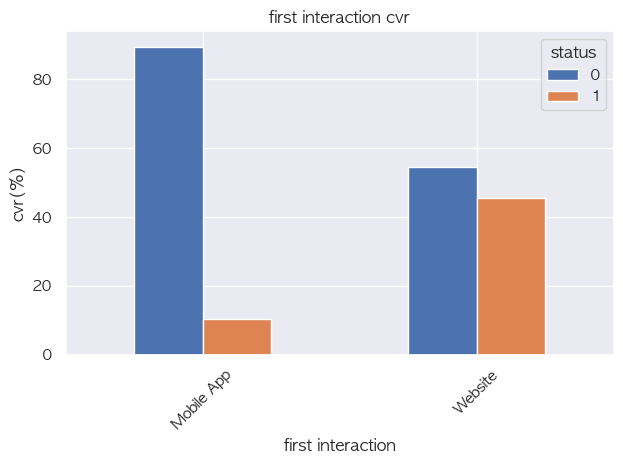

<Figure size 1200x600 with 0 Axes>

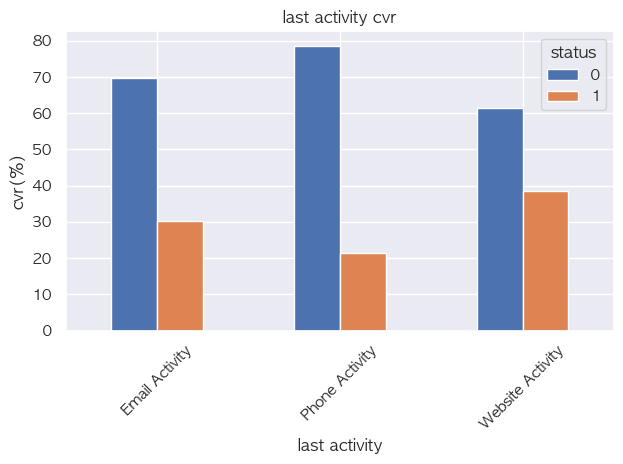

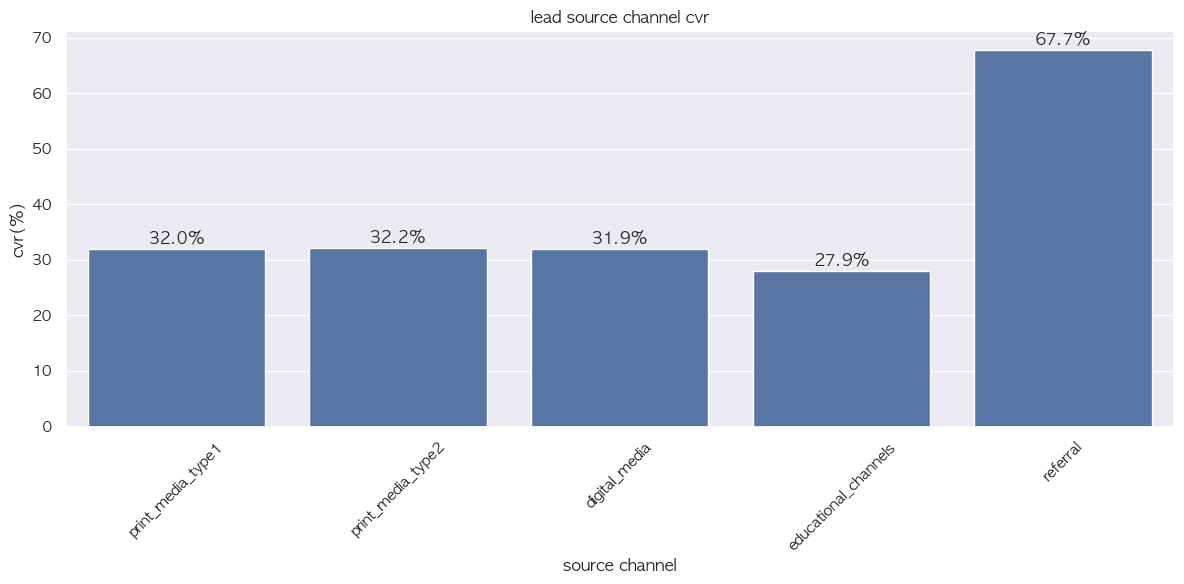


lead source channel cvr:


,source,conversion_rate
0,print_media_type1,31.99000
1,print_media_type2,32.19000
2,digital_media,31.88000
3,educational_channels,27.94000
4,referral,67.74000


<Figure size 1000x600 with 0 Axes>

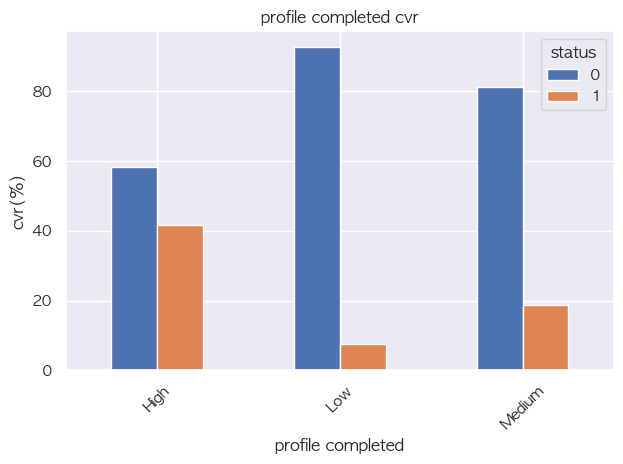

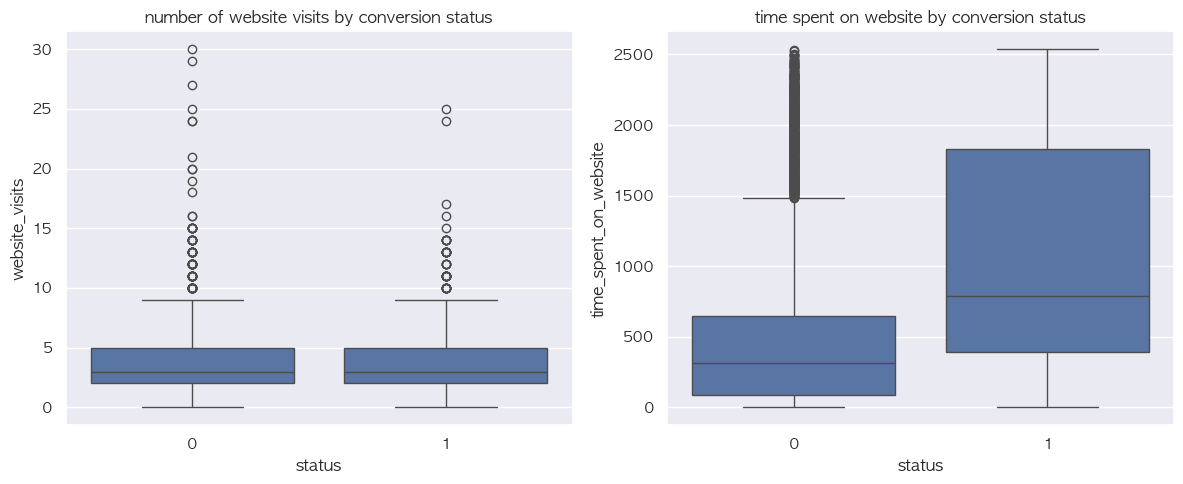

In [29]:
plt.style.use('default')  
sns.set_theme() 
plt.rcParams['font.family'] = 'AppleGothic'  
plt.rcParams['axes.unicode_minus'] = False   


# 1. 현재 직업과 리드 상태의 관계 분석
plt.figure(figsize=(10, 6))
occupation_conversion = pd.crosstab(df['current_occupation'], df['status'], normalize='index') * 100
occupation_conversion.plot(kind='bar')
plt.title('current occupation cvr')
plt.xlabel('occupation')
plt.ylabel('cvr(%)')
plt.legend(title='status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. 첫 상호작용 채널과 리드 상태의 관계 분석
plt.figure(figsize=(10, 6))
interaction_conversion = pd.crosstab(df['first_interaction'], df['status'], normalize='index') * 100
interaction_conversion.plot(kind='bar')
plt.title('first interaction cvr')
plt.xlabel('first interaction')
plt.ylabel('cvr(%)')
plt.legend(title='status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. 마지막 활동과 리드 상태의 관계 분석
plt.figure(figsize=(12, 6))
activity_conversion = pd.crosstab(df['last_activity'], df['status'], normalize='index') * 100
activity_conversion.plot(kind='bar')
plt.title('last activity cvr')
plt.xlabel('last activity')
plt.ylabel('cvr(%)')
plt.legend(title='status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. 리드 소스 채널별 전환율 분석
lead_sources = ['print_media_type1', 'print_media_type2', 'digital_media', 
                'educational_channels', 'referral']

conversion_rates = []

for source in lead_sources:
    # 해당 채널을 통해 유입된 전체 리드 수
    total_leads = df[df[source] == 1].shape[0]
    
    # 해당 채널을 통해 유입되어 전환된 리드 수
    converted_leads = df[(df[source] == 1) & (df['status'] == 1)].shape[0]
    
    # 전환율 계산 (퍼센트)
    conversion_rate = (converted_leads / total_leads * 100) if total_leads > 0 else 0
    
    conversion_rates.append({
        'source': source,
        'conversion_rate': conversion_rate
    })

# 데이터프레임 생성
source_conversion_df = pd.DataFrame(conversion_rates)

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=source_conversion_df, x='source', y='conversion_rate')
plt.title('lead source channel cvr')
plt.xlabel('source channel')
plt.ylabel('cvr(%)')
plt.xticks(rotation=45)

# 각 막대 위에 값 표시
for i, v in enumerate(source_conversion_df['conversion_rate']):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center')

plt.tight_layout()
plt.show()

# 결과를 표 형태로도 출력
print("\nlead source channel cvr:")
display(source_conversion_df.round(2))


# 5. 프로필 완성도와 전환율의 관계 분석
plt.figure(figsize=(10, 6))
profile_conversion = pd.crosstab(df['profile_completed'], df['status'], normalize='index') * 100
profile_conversion.plot(kind='bar')
plt.title('profile completed cvr')
plt.xlabel('profile completed')
plt.ylabel('cvr(%)')
plt.legend(title='status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 추가적인 인사이트: 웹사이트 활동과 전환율의 관계
plt.figure(figsize=(12, 5))

# 웹사이트 방문 횟수와 전환 상태의 관계
plt.subplot(1, 2, 1)
sns.boxplot(x='status', y='website_visits', data=df)
plt.title('number of website visits by conversion status')

# 웹사이트 체류 시간과 전환 상태의 관계
plt.subplot(1, 2, 2)
sns.boxplot(x='status', y='time_spent_on_website', data=df)
plt.title('time spent on website by conversion status')

plt.tight_layout()
plt.show()

#### 1. Current Occupation and Conversion Rate
- The conversion rate of the **Professional** group is significantly higher than other groups (e.g., **Student** and **Unemployed**).
- The **Student** group has the lowest conversion rate.
- **Insights**:
  1. The **Professional** group, with higher job stability, is likely to have more financial resources to invest in educational programs, resulting in higher conversion potential.
  2. If the focus needs to be narrowed, targeting the **Professional** group may be an effective strategy.

---

#### 2. First Interaction Channel and Conversion Rate
- The conversion rate for interactions via **Website** is higher than that of **Mobile App**.
- **Insights**:
  1. Information or user experience provided on the **Website** appears to have a positive impact on conversion.
  2. Improving the user experience on the **Mobile App** or strengthening app-specific promotional strategies is necessary.

---

#### 3. Last Activity and Conversion Rate
- **Website Activity** as the last interaction shows the highest conversion rate, while **Phone Activity** as the last interaction has the lowest conversion rate.

---

#### 4. Conversion Rate by Lead Source Channel
- **Referral** channels have the highest conversion rate, whereas **Educational Channels** have the lowest conversion rate.
- **Insights**:
  1. Activating a **Referral Program** to leverage the existing customer base would be beneficial.

---

#### 5. Profile Completion and Conversion Rate
- Leads with a high level of profile completion show the highest conversion rates.
- Leads with low profile completion have almost no conversion potential.
- **Insights**:
  1. Campaigns encouraging users to complete their profiles or improving UX/UI to enhance profile completion rates are necessary.

---

#### 6. Website Activity and Conversion Rate
- Longer time spent on the website correlates with higher conversion potential (the number of website visits itself does not appear to be a key factor in conversion).
- **Insights**:
  1. Strategies to enhance website content that increases dwell time should be implemented.

## Building a Decision Tree model

1. There is no null data.
2. Handling Categorical Data
- Since Decision Tree is a non-linear model, it is more suitable to convert categorical data using Label Encoding.
3. Feature Scaling
- For Decisition Tree Modeling, Scaling is unnecessary so it can be omitted.

In [31]:
from sklearn.preprocessing import LabelEncoder

data = df.copy()

# Categorical columns to apply Label Encoding
categorical_columns = ['current_occupation', 'first_interaction', 
                       'profile_completed', 'last_activity']

# Perform Label Encoding for each column
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  

# Check preprocessed data
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,2,1,0,7,1639,1.86100,2,1,0,1,0,0,1
1,EXT002,56,0,0,2,2,83,0.32000,2,0,0,0,1,0,0
2,EXT003,52,0,1,2,3,330,0.07400,2,0,0,1,0,0,0
3,EXT004,53,2,1,0,4,464,2.05700,2,0,0,0,0,0,1
4,EXT005,23,1,1,0,4,600,16.91400,0,0,0,0,0,0,0


Accuracy(Test set): 0.7930660888407367

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       647
           1       0.65      0.66      0.66       276

    accuracy                           0.79       923
   macro avg       0.75      0.75      0.75       923
weighted avg       0.79      0.79      0.79       923



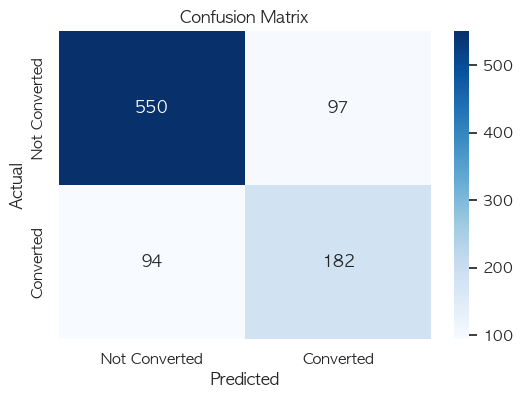

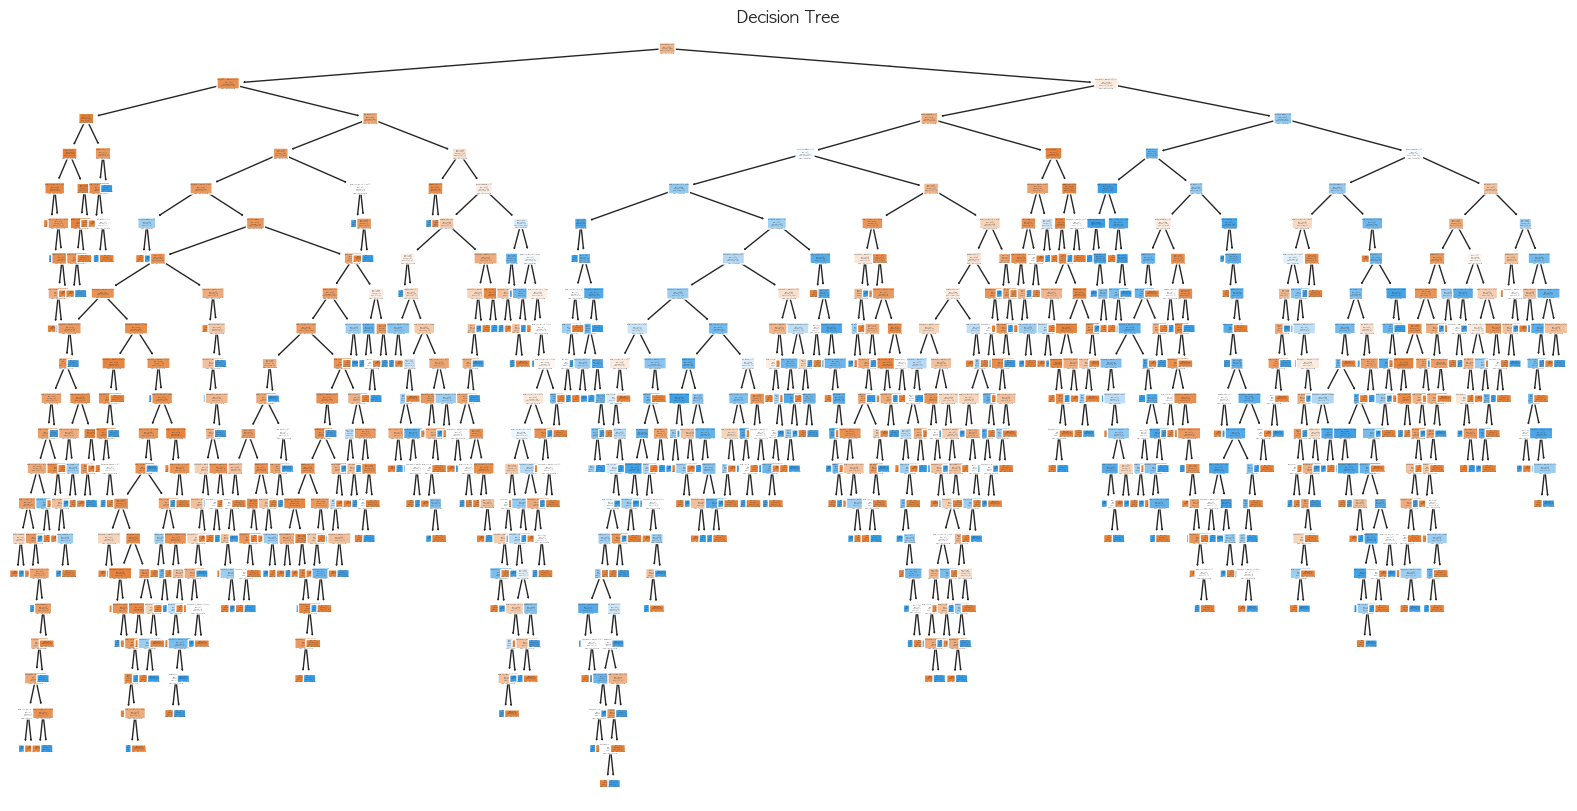

In [35]:
# 1. Split the data
X = data.drop(columns=['ID','status'])  # Features
y = data['status']  # Target variable

# Train-test split (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 2. Create the model
clf = DecisionTreeClassifier(random_state=42)

# 3. Train the model
clf.fit(X_train, y_train)

# 4. predictions
y_pred = clf.predict(X_test)

# 5. Evaluate the model
print("Accuracy(Test set):", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix visualizatoin
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Converted', 'Converted'], yticklabels=['Not Converted', 'Converted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 6. Visualize the tree
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['Not Converted', 'Converted'], filled=True, rounded=True)
plt.title('Decision Tree')
plt.show()

#### 1. Accuracy
- The overall accuracy of the model is **79.31%**, indicating relatively decent performance.

---

#### 2. Class 0 (Not Converted)
- **Precision: 85%**  
  85% of the data predicted as Class 0 are actually Class 0.

- **Recall: 85%**  
  85% of the actual Class 0 data were correctly predicted.

- **F1-score: 85%**  
  The F1-score, which is the harmonic mean of Precision and Recall, is 85%.

---

#### 3. Class 1 (Converted)
- **Precision: 65%**  
  65% of the data predicted as Class 1 are actually Class 1.

- **Recall: 66%**  
  66% of the actual Class 1 data were correctly predicted.

- **F1-score: 66%**  
  The F1-score, which is the harmonic mean of Precision and Recall, is 66%.

---

#### 4. Confusion Matrix
- The prediction accuracy for **Class 0 (Not Converted)** is high.
- For **Class 1 (Converted)**, prediction accuracy is relatively lower (Recall: 66%).

---

#### Insights

##### 1. Impact of Class Imbalance
- Due to the higher number of Class 0 data, Recall and Precision for Class 1 are relatively lower.

##### 2. Overall Performance Improvement
- Model performance can be optimized using Pruning or Hyperparameter Tuning.

## Do we need to prune the tree?

Pruning can prevent overfitting and improve the generalization performance of a Decision Tree.  
Since Decision Trees are prone to overfitting, pruning can significantly enhance performance. 

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'ccp_alpha': 0.0, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}

Accuracy (Test set): 0.8494041170097508

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.90       647
           1       0.79      0.68      0.73       276

    accuracy                           0.85       923
   macro avg       0.83      0.80      0.81       923
weighted avg       0.85      0.85      0.85       923



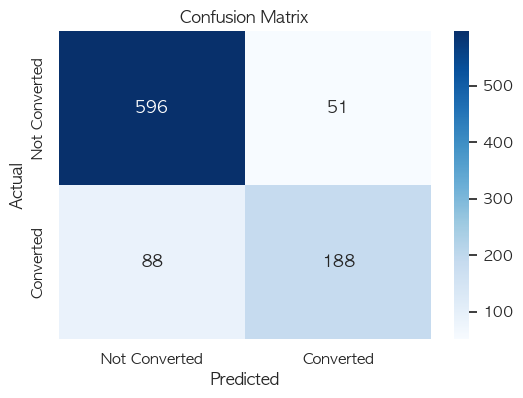

In [36]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'ccp_alpha': [0.0, 0.01, 0.1]
}

# Define the Decision Tree model
clf = DecisionTreeClassifier(random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

print("\nAccuracy (Test set):", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Converted', 'Converted'], yticklabels=['Not Converted', 'Converted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Decision Tree Model Performance Comparison and Summary

### 1. Tuned Hyperparameters
- `ccp_alpha`: 0.0
- `max_depth`: 5
- `min_samples_leaf`: 4
- `min_samples_split`: 2

### 2. Performance Comparison
| Metric              | Original Model | Tuned Model |
|---------------------|----------------|-------------|
| **Accuracy**        | 79.3%         | 84.9%      |
| **Precision**       |                |             |
| - Class `0`         | 85%           | 87%         |
| - Class `1`         | 65%           | 79%         |
| **Recall**          |                |             |
| - Class `0`         | 85%           | 92%         |
| - Class `1`         | 66%           | 68%         |
| **F1-Score**        |                |             |
| - Class `0`         | 0.85          | 0.90        |
| - Class `1`         | 0.66          | 0.73        |

### 3. Key Improvements
- **Accuracy Improvement**: From 79.3% to 84.9% (5.6%p increase).
- **Class `1` Precision**: Increased from 65% to 79%.
- **Class `0` Recall**: Increased from 85% to 92%.
- **Reduced Tree Complexity**: Limited `max_depth` to 5 to mitigate overfitting risks.
- **Improved Confusion Matrix**: Reduced the number of False Negatives for Class `1`.

## Building a Random Forest model

Class imbalance may affect the model’s performance, so the class_weight option should be considered.

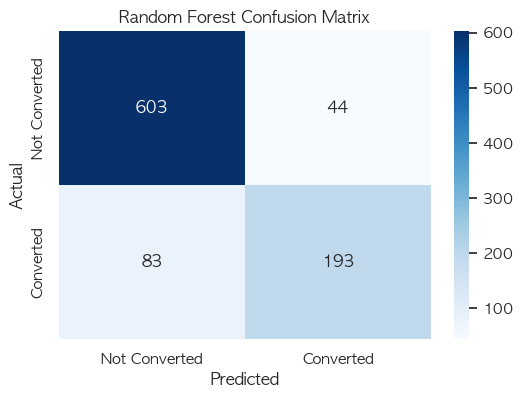

Accuracy: 0.8624052004333694

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90       647
           1       0.81      0.70      0.75       276

    accuracy                           0.86       923
   macro avg       0.85      0.82      0.83       923
weighted avg       0.86      0.86      0.86       923



In [38]:
X = data.drop(columns=['ID','status'])  # Features
y = data['status']  # Target variable

# Split into training and testing sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the RandomForest model
rf_clf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_clf.fit(X_train, y_train)

# predictions and evaluate the model
y_pred = rf_clf.predict(X_test)

# Accuracy and classification report
rf_accuracy = accuracy_score(y_test, y_pred)
rf_classification_report = classification_report(y_test, y_pred)
rf_confusion_matrix = confusion_matrix(y_test, y_pred)

# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(rf_confusion_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Converted', 'Converted'], yticklabels=['Not Converted', 'Converted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Print evaluation metrics
print("Accuracy:", rf_accuracy)
print("\nClassification Report:\n", rf_classification_report)

## Random Forest Model Results

### 1. Accuracy
- **86.2%**, which is slightly better than the base Decision Tree model (79.3%) and the Pruned model (84.9%).

### 2. Classification Report
#### Class `0` (Not Converted)
- **Precision**: 88%
- **Recall**: 93%
- **F1-Score**: 0.90

#### Class `1` (Converted)
- **Precision**: 81%
- **Recall**: 70%
- **F1-Score**: 0.75

- The recall for Class `1` remains relatively low, but the Random Forest provides more balanced results compared to the Pruned Decision Tree.

### 3. Confusion Matrix
- **Class `0`**: Predicted 603 out of 647 correctly (**93% Recall**).
- **Class `1`**: Predicted 193 out of 276 correctly (**70% Recall**).

## Do we need to prune the tree?

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


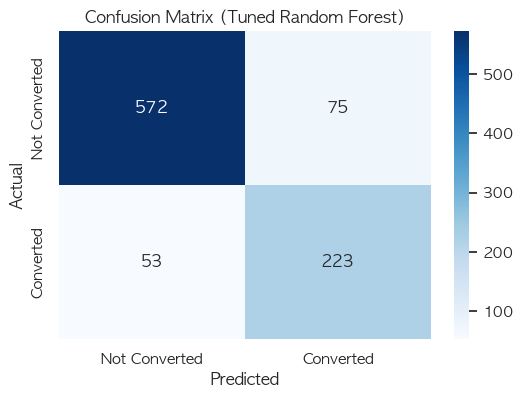

Best Parameters: {'class_weight': 'balanced', 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}

Accuracy: 0.8613217768147345

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       647
           1       0.75      0.81      0.78       276

    accuracy                           0.86       923
   macro avg       0.83      0.85      0.84       923
weighted avg       0.87      0.86      0.86       923



In [40]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [5, 10, 15, None],   # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None],  # Number of features to consider for splits
    'class_weight': ['balanced', 'balanced_subsample']  # Handling class imbalance
}

# Initialize the Random Forest model
rf_clf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Fit Grid Search
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Converted', 'Converted'], yticklabels=['Not Converted', 'Converted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Tuned Random Forest)')
plt.show()

# Print results
print("Best Parameters:", grid_search.best_params_)
print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)

## Random Forest Model Comparison: Pre- and Post-Pruning

### 1. Tuned Hyperparameters
- `class_weight`: balanced
- `max_depth`: 15
- `max_features`: sqrt
- `min_samples_leaf`: 1
- `min_samples_split`: 10
- `n_estimators`: 100

### 2. Performance Comparison
| Metric              | Original Model | Tuned Model |
|---------------------|----------------|-------------|
| **Accuracy**        | 86.2%         | 86.1%      |
| **Precision**       |                |             |
| - Class `0`         | 88%           | 92%         |
| - Class `1`         | 81%           | 75%         |
| **Recall**          |                |             |
| - Class `0`         | 93%           | 88%         |
| - Class `1`         | 70%           | 81%         |
| **F1-Score**        |                |             |
| - Class `0`         | 0.90          | 0.90        |
| - Class `1`         | 0.75          | 0.78        |


### 3. Key Improvements
- The accuracy remains nearly the same, but the post-pruning model provides more balanced performance.
- The post-pruning model significantly improves Recall for Class `1` (Converted), enabling the identification of more Positive cases.
- **Reason for Selecting Post-Pruning Model**:
  - The Recall for Positive cases (Class `1`) improves significantly, providing more balanced performance.
  - Suitable for scenarios where minimizing missed Positive cases is a priority.

## Actionable Insights and Recommendations

- **Prioritize High-Conversion Customers**:
  - Leverage the model's insights to identify top prospects and allocate resources accordingly, focusing on the 20% most likely to convert.
  - Example)
    - Extend free trial periods for these high-potential customers.
    - Craft personalized offerings, such as curated product suggestions or exclusive discounts.
- **Refine Campaign Strategies**:
  - Tailor your approach by applying high-impact, resource-intensive strategies to high-probability customers, while using more cost-effective methods for those less likely to convert.
- **Optimize Marketing Spend**:
  - Take advantage of the model's accuracy in identifying non-converting customers to minimize wasted marketing efforts.
  - Example) Shift from broad-based campaigns to more targeted, focused initiatives.
- **Uncover Non-Conversion Factors**:
  - Dig into the behavior patterns of customers the model flags as unlikely to convert to identify potential roadblocks.
  - Example) Use these insights to fine-tune pricing strategies, enhance product features, or improve user experience.

---

- **Implement Tiered Targeting**:
  - Categorize customers into three groups based on their predicted conversion likelihood:
    - Top 20%: Roll out the red carpet with premium, high-touch campaigns.
    - Middle 40%: Engage with standard promotional efforts.
    - Bottom 40%: Focus on brand awareness and retention with minimal resource allocation.
- **Implement A/B Testing**:
  - Evaluate the effectiveness of campaigns designed using the post-pruning model against traditional approaches.
  - Key in on metrics like conversion rates, return on investment, and customer loyalty.
- **Create a Campaign Feedback Loop**:
  - Continuously refine the model by feeding campaign outcomes back into it.
- **Identify Key Conversion Drivers**:
  - Analyze feature importance to determine the factors most influencing conversions.
    - Example) "Time spent on the website" may be critical drivers.
- **Set Priorities for Service Improvement**:
  - Use the identified drivers to prioritize service enhancements.
    - Example) Enhance the UI/UX to encourage behaviors associated with high conversion likelihood.
- **Expand Behavioral Tracking**:
  - Gather additional data related to customer behavior to improve model performance.
    - Example) Purchase history, click logs, or navigation paths.
- **Micro-Segment Analysis**:
  - Break down customers into finer segments for deeper insights (e.g., age groups, interests, purchasing cycles).

- **Leverage Social Media Activity(Referral)**:
  - Use data such as brand mentions, follower counts, or keyword usage frequency to enhance conversion predictions.
